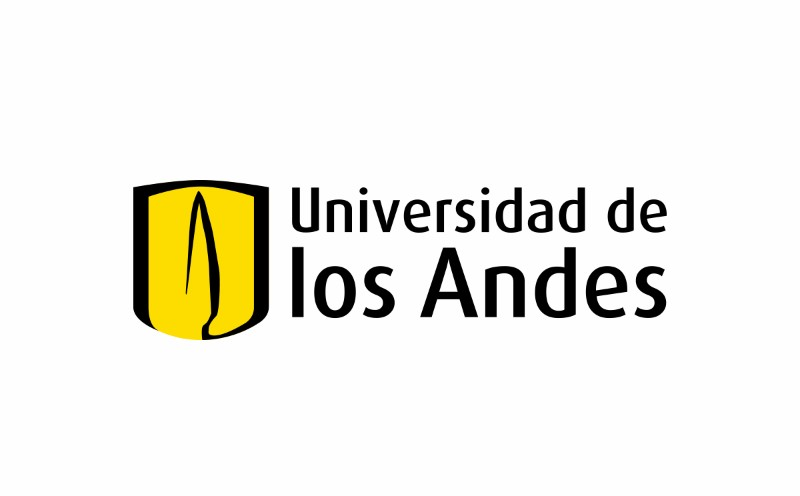
<br>

# Desarrollo de ambientes para la evaluación de algoritmos de Reinforcement Learning aplicados a la cadena de suministro

<br>
<br>
<br>
   
### Traveler Purchaser Problem (TPP)
Hay $N$ número de ciudades, $M$ número de commodities, los tiempos entre todos los nodos y el costo de cada commodity en cada ciudad. Al partir de un nodo inicial, es de interés la rúta óptima entre las ciudades con las respectivas compras de cada una con el fin de minimizar el costo total (compuesto por las compras y por los desplazamientos).



### Contexto
- OR-GYM: Desarrollo por parte de investigadores Carneige Mellon University que cuenta con diversos ambientes con diversos problemas clásicos de *Operations Research*. Cuentan con ambientes de instancias de problemas como VRP, TSP, Asignación, inventarios, etc.


- GRASP Algotithm: Algoritmo desarrollado por parte de investigadores de la Universidad de los Andes que implementa un MIP para resolver el problema del TPP. Por su naturaleza lineal, este es un algoritmo óptimo con la desventaja de la escalabilidad.

### Modelamiento
- Estado
$$S_t = (posición,1,2,..,N-1,1,2,...,M)$$
$$Ciudad: 1 \space \space si \space \space no \space \space se \space \space ha \space \space visitado \space \space la \space \space ciudad, \space \space 0  \space \space dlc.$$
$$Commodity: 1 \space \space si \space \space ya \space \space se \space \space \space \space compró, \space \space 0 \space \space dlc.$$

<br>

- Acciones
$$A_t = (dirección, 1,2,...,M)$$
$$ 1 \space \space si \space \space se \space \space comprará \space \space el \space \space commodity \space \space en  \space \space esta \space \space ciudad, \space \space 0  \space \space dlc. $$

<br>

- Rewards 
        Acción factible: Costo del despazamiento a cada ciudad y la compra de los respectivos commodities
        Acción infactible: Costo de penalización

<br>

- Política de transición
        Transición determinística entre estados. Para una acción infactible su estado permanecerá igual.

In [1]:
from ipywidgets import interactive, interact
import ipywidgets as widgets
import TPP_environment as TPP

TPP.imprimir_estado()

'El nodo actual es el nodo: 0.            No se han visitado nodos aún.            No se han comprado commodities aún'

In [2]:
direccion, producto_1, producto_2, producto_3, producto_4 = TPP.accion()
display(direccion, producto_1, producto_2, producto_3, producto_4)

interactive(children=(Dropdown(description='direccion', options=(0, 1, 2, 3), value=0), Output()), _dom_classe…

interactive(children=(Dropdown(description='producto_1', options=(0, 1), value=0), Output()), _dom_classes=('w…

interactive(children=(Dropdown(description='producto_2', options=(0, 1), value=0), Output()), _dom_classes=('w…

interactive(children=(Dropdown(description='producto_3', options=(0, 1), value=0), Output()), _dom_classes=('w…

interactive(children=(Dropdown(description='producto_4', options=(0, 1), value=0), Output()), _dom_classes=('w…

In [3]:
TPP.actualizar_estado(TPP.estado)

'El nodo actual es el nodo: 0.            No se han visitado nodos aún.            No se han comprado commodities aún.            El costo de la acción es: 0'

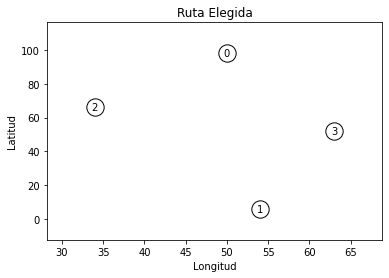

In [4]:
TPP.env.render()

In [5]:
print(TPP.env.state)

[0 1 1 1 0 0 0 0]


 ### Evaluación de Algoritmos

Para evaluar el desempeño del ambiente, se compararon varios algoritmos de diversas naturalezas sobre varias instancias para poder visualizar el desempeño de los mismos y del ambiente. Para esto, se tuvieron en cuenta las siguientes aprecaciones:

<br>
 
 **Generación de acciones**  : Uno de los mayores retos de los algoritmos de Reinforcement Learning en problemas combinatorios es la generación de los estados y las acciones. Por lo tanto, para generar las acciones se emplearon 3 métodos.

- Greedy: Para algún nodo factibe escogido aleatoriamente, se compran todos los commodities disponibles y faltantes.

- K-elementos: Para algún nodo factible escogido aleatoriamente, se compran aleatoriamente entre los que haya disponible o un número k, elementos

- Heurística con RCL: Se genera una lista restricta de nodos candidatos para visitar, y se escoge un nodo de estos al azar. Una vez en este nodo, se escoge comprar los elementos más baratos y para los demás disponibles se compran basados en una probabilidad basada en la media de los precios en todas las tiendas de dicho elemento.

**Algoritmos implementados**

- Q-Learning
- Mixed Integer Programming (GRASP)

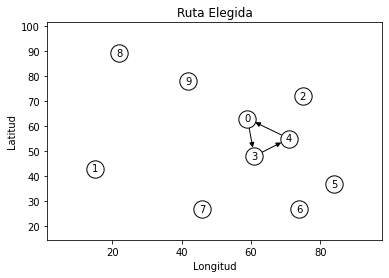

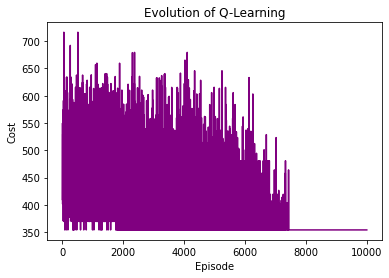



################ RESULTS ################


Q-Learning Performance
With 10000 training episodes taking 34.665 s.
The total reward is: 354.38
The optimar route is [(0, 3), (3, 4), (4, 0)]


MIP Performance
Welcome to the CBC MILP Solver 
Version: 2.9.0 
Build Date: Feb 12 2015 

command line - /opt/anaconda3/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/m6/89fwm0dn5mjbdz4tkj6586bm0000gn/T/587ec3230f3744648c7cee80a7508d8e-pulp.mps branch printingOptions all solution /var/folders/m6/89fwm0dn5mjbdz4tkj6586bm0000gn/T/587ec3230f3744648c7cee80a7508d8e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 137 COLUMNS
At line 980 RHS
At line 1113 BOUNDS
At line 1222 ENDATA
Problem MODEL has 132 rows, 143 columns and 501 elements
Coin0008I MODEL read with 0 errors
Continuous objective value is 287521 - 0.00 seconds
Cgl0003I 0 fixed, 9 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 131 rows, 142 c

In [6]:
import Q_Learning as QL

### Resultados 


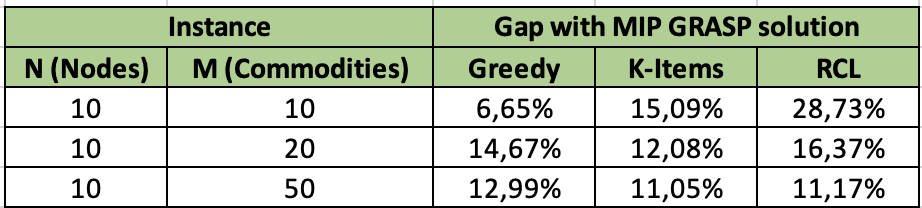

### Enfoque
El desarrollo del proyecto tiene muchos frentes en los cuales se puede avanzar e innovar, los cuales no son excluyentes. Es más, todos buscan un desarrollo más completo del conocimiento adquirido y posible expansión de los conocimientos actuales.

- Implementación de otros algoritmos: Utilizando el ambiente ya desarrollado, se pueden implementar otros algoritmos de Reinforcement Learning, heurísticas y otras para evaluar su desempeño. 

- Estocasticidad: Incluir elementos estocásticos en el ambiente. Entre ellos puede estar: tiempo estocástico de viaje entre los nodos, precios estocásticos conocidos únicamente al llegar a un nodo, etc.

- Desarrollo de un *gym*: Desarrollar otros ambientes que complementen a los ya existentes en el OR-gym. Entre estos podrían estar problemas más específicos. 